# Comparing Alcohol Content in Red and White Wines

##### By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Introduction

For those who drink wine, knowing the alcohol content of the wine is often very important to them. The alcohol content of both red and white wines are a quality of interest for both consumers and producers. In our study,  the mean alcohol content of wines from red and white wine datasets are compared. The first data set contains 1599 red wines with data on their composition and quality. The other data set contains 4898 white wines with data on their composition and quality. A hypothesis test will be performed comparing the mean alcohol content of the 2 types of wine and a confidence interval of the difference of means of alcohol content in the two types of wine(red and white) will be obtained. Another aspect of our report will be to estimate this confidence interval using asymptotics and will compare the two techniques. Along with this the quantiles for the alcohol concentration in red and white wine will be analyzed.

## Attribute Information 
- `fixed acidity` - Primary fixed acids found in wine such as tartaric and malic acid. 
- `volatile acidity` - It is the gaseous acids present in the wine 
- `citric acid` - It is a weak organic fluid, found in citrus fruits naturally
- `residual sugar` - Amount of sugar left after fermentation 
- `chlorides` - Amount of salt present in wine 
- `free sulfur dioxide` - So2 is used for prevention of wine by oxidation and microbial spoilage 
- `total sulfur dioxide`
- `density` - The density of the wine 
- `pH` - Used for checking the amount of acidity 
- `sulphates` - Additional sulfites preserve the freshness and protects the wine from oxidation and bacteria 
- `alcohol` - Percent of alcohol present in the wine
- `quality` - Output variable 



# Methods and Results
## Preliminary Results

In [205]:
suppressPackageStartupMessages({
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)
})


In [206]:
# Read the two dataset(red wine and white wine csv) into jupyter notebook

wine_quality <- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality) <- make.names(names(wine_quality), unique = TRUE)

wine_quality <- cbind(wine_quality, type = "red")


wine_quality_white <- read_delim('winequality-white.csv', show_col_types = FALSE)
names(wine_quality_white) <- make.names(names(wine_quality_white), unique = TRUE)

wine_quality_white <- cbind(wine_quality_white, type = "white")

# Now we would combine the two datasets based on the type of wine(red and white)

combined_data <- rbind(wine_quality, wine_quality_white)  
cat("Figure 1: Initial Wine Data")
head(combined_data) 

Figure 1: Initial Wine Data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


### Observed means for alcohol content in red and white wine
A random sample of size 100 was taken from each dataset and the average alcohol content was estimated for both red and white wine.

In [207]:
set.seed(4242)

#Taking a sample of size 100 from the dataset

#red wine sample
alcohol_sample <- wine_quality %>% 
    rep_sample_n(size = 100, replace = FALSE) %>% 
    select(alcohol)

#white wine sample
alcohol_white_sample <- wine_quality_white %>% 
     rep_sample_n(size = 100, replace = FALSE) %>% 
     select(alcohol)


#Calculate the mean of alcohol content from the red wine sample 
observed_alc_mean <- alcohol_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

#Calculate the mean of alcohol content from the white wine sample
observed_alc_white_mean <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

cat("Mean of alcohol content from red wine sample:")
pull(observed_alc_mean)
cat("Mean of alcohol content from white wine sample:")
pull(observed_alc_white_mean)



Adding missing grouping variables: `replicate`

Adding missing grouping variables: `replicate`



Mean of alcohol content from red wine sample:

[1] 10.2775

Mean of alcohol content from white wine sample:

[1] 10.429

It can be estimated that the mean alcohol content in red wine is 10.277(vol.%) and the mean alcohol content in white wine is 10.429(vol.%)

### Investigation on Quantiles for the alcohol content in red and white wine 

In [208]:
## Take a sample of the datasets and select the variable of interest (alcohol)
sample <- wine_quality %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

sample_white <- wine_quality_white %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)


In [209]:
## Calculate 0.25th and 0.75th quantiles

#0.25th quantile for red wine 
lower_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for red wine
upper_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.75)

#0.25th quantile for white wine 
lower_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for white wine 
upper_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.75)

# difference of upper and lower quantile for red wine 
iqr <- upper_quantile - lower_quantile

#difference of upper and lower quantile for white wine 
iqr_white <- upper_quantile_white - lower_quantile_white



lower_quantile #0.25th quantile for red wine 
upper_quantile #0.75th quantile for red wine
lower_quantile_white #0.25th quantile for white wine 
upper_quantile_white #0.75th quantile for white wine 
iqr # difference of upper and lower quantile for red wine 
iqr_white #difference of upper and lower quantile for white wine 

25% 
9.5

75% 
 11

25% 
9.4

75% 
11.325

75% 
1.5

75% 
1.925

From the values produced above we see that the alcohol content in white wine is not equal to the alcohol content in red wine. 

Figure 2: Sample distributions of red and white wine populations

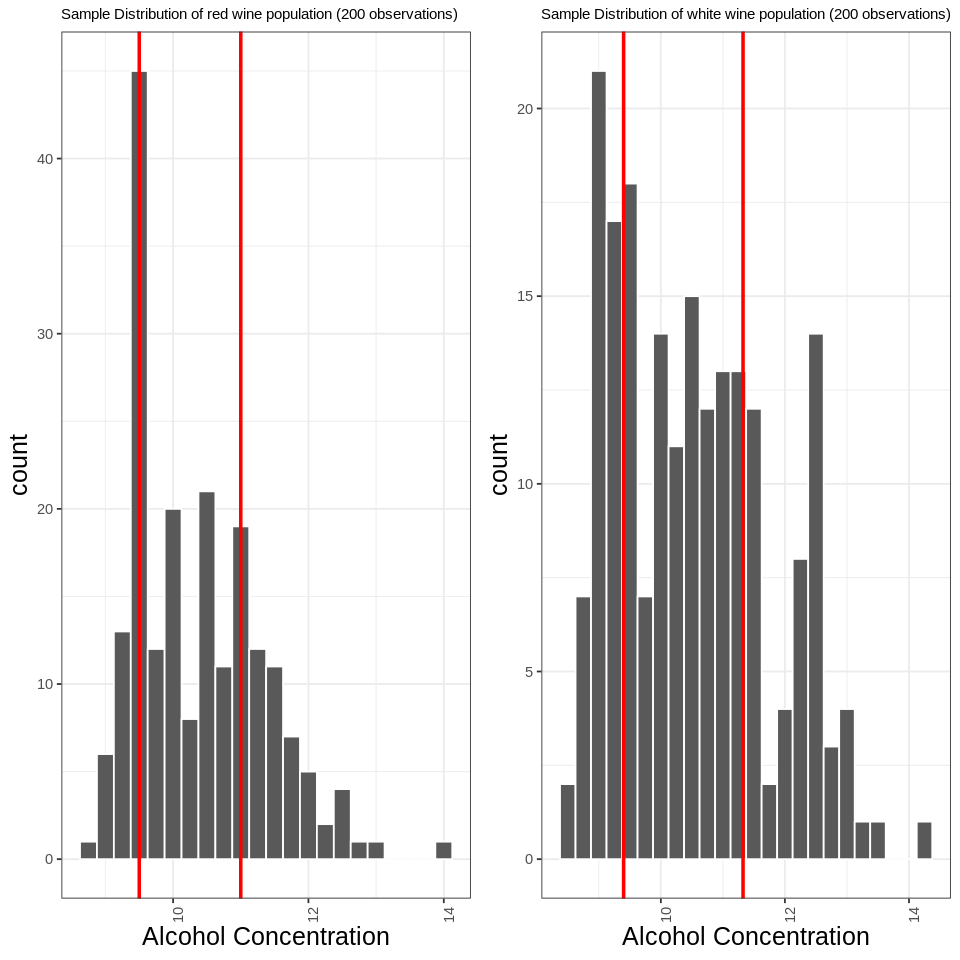

In [210]:
options(repr.plot.width = 8, repr.plot.height = 8)
## Plot the distribution of the sample with quantiles 
quantile_plot <- 
    sample %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution of red wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 9)) +
    theme(axis.title = element_text(size = 15))

quantile_plot_white <- 
    sample_white %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile_white, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile_white, colour = "red", size = 1) +
    labs(title = "Sample Distribution of white wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 9)) +
    theme(axis.title = element_text(size = 15))



plots_row <- plot_grid(quantile_plot + 
                           theme(axis.text.x = element_text(angle = 90)),

                           quantile_plot_white +  
                           theme(axis.text.x = element_text(angle = 90)), 
                           ncol = 2)

dist_grid <- plot_grid(plots_row, 
                        rel_heights = c(0.5, 1), rel_widths = c(2, 1))
cat("Figure 2: Sample distributions of red and white wine populations")
dist_grid


After examining the histograms, the previous statement can be refuted, as it seems there is an usual amount of 
values around the point 9.5. It seems that the sample taken from the red wine population is slightly right-skewed, which explains the larger IQR. Therefore an estimate is formed that the variance of alcohol in red wine and alcohol in white wine are approximately similar. To test this observation a hypothesis test will be conducted examining to see if the difference in means of the alcohol contents are significant with a 5% significance level.


### Methods: Plan
This dataset is trustworthy since it comes from a reliable source since it was from a database recommended on the course page. Moreover, an academic paper (Cortez et. al) was written on this data, further suggesting that it is a reliable source of data.
To summarize the preliminary findings, the observed mean alcohol content for both red and white wines was estimated using sampling. Furthermore, the IQR of the alcohol content of both types of wine was analyzed to compare the differences in alcohol content. This illustrated that the alcohol contents of both wines were fairly similar. However, to test the significance of this difference a hypothesis test will be conducted on these variables. 

A hypothesis test will be conducted using the infer package where in the null hypothesis states that there is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine. Additionally a 95% confidence interval for the difference in means will be determined to further support the analysis. 

## Results
### Hypothesis Test
H<sub>0</sub> : There is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine (Alcohol Content of Red Wine - Alcohol Content of White Wine)

H<sub>A</sub> : There is significant difference between average alcohol amount in red wine and average alcohol amount in white wine (Alcohol Content of Red Wine - Alcohol Content of White Wine)

In [211]:
# Selecting the columns of interest from the data
alcohol_data <-
combined_data %>% 
select(alcohol, type) %>% 
filter(!is.na(alcohol))
cat("Figure 3: Filtered data containing only alcohol amount and type of wine")
head(alcohol_data)

Figure 3: Filtered data containing only alcohol amount and type of wine

,alcohol,type
,<dbl>,<chr>
1,9.4,red
2,9.8,red
3,9.8,red
4,9.8,red
5,9.4,red
6,9.4,red


In [212]:
# Counting the amount of each type
wines_count <-
    alcohol_data %>% 
    count(type)
cat("Figure 4: Number of data points for red and white wine")
wines_count

Figure 4: Number of data points for red and white wine

type,n
<chr>,<int>
red,1599
white,4898


In [213]:
# Calculating the observed test statistic using the infer package
obs_diff_in_means <- 
    alcohol_data  %>% 
    specify(formula = alcohol ~ type) %>%
    calculate(stat = "diff in means", order = c("red", "white"))
obs_diff_in_means

stat
<dbl>
-0.09128393


In [214]:
set.seed(1234)

# Generating 1000 samples from the null distribution
null_diff_in_means <- 
    alcohol_data %>% 
    specify(formula = alcohol ~ type) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("red", "white"))
head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.01655833
2,0.01361893
3,0.02062868
4,0.06468639
5,-0.05336770
6,0.03065248


Figure 5: Results of hypothesis test with test-statistic shown

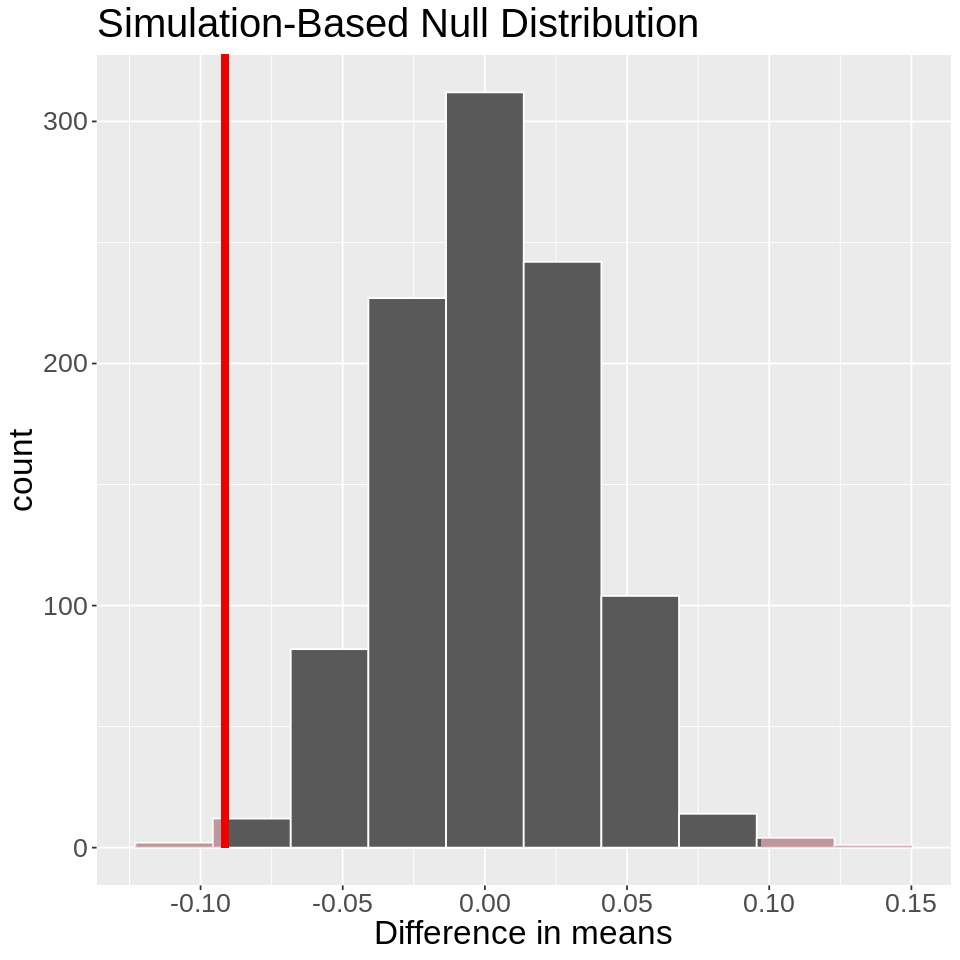

In [215]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Plot results of hypothesis test and observe the test-statistic using the vertical bar 
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
cat("Figure 5: Results of hypothesis test with test-statistic shown")
diff_in_means_plot

The above distribution shows the null distribution of the difference in means and where the test statistic lies. This distribution supports the analysis since there is hardly any shaded region, suggesting that the likelihood of the null hypothesis being true is quite small. If the null hypothesis was true, the shaded area would be much larger. 

In [216]:
# Finding the p-value
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")
p_value

p_value
<dbl>
0.006


The obtained p-value is 0.006. At 5% significance level (0.05), the null hypothesis is rejected since the observed p-value is less than the significance level. Based on the hypothesis test, there is a 95% confidence that the alcohol content of red wine is not equal to the alcohol content of white wine. The hypothesis test supports previous findings that estimates that white wine would have a higher mean alcohol content of 10.429(vol.%) as compared to red wine that has a mean alcohol content of 10.277(vol.%). 

### 95% Confidence Interval for Difference in Means Using Bootstrapping

Next, the 95% confidence interval for the difference in means is constructed to examine whether the observed value of difference in means (-0.0912) lies within the bounds of the interval. 

In [260]:
# Finding bootstrap distribution for the difference in means 
diff_in_means_bootstrap_dist <- 
    alcohol_data %>%
    specify(formula = alcohol ~ type) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("red", "white"))  
head(diff_in_means_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-0.04611298
2,-0.11425852
3,-0.06270524
4,-0.08153959
5,-0.10979920
6,-0.12491275


In [261]:
# Finding the 95% confidence interval
diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
cat("For the 95% confidence interval:")
diff_in_means_ci

For the 95% confidence interval:

lower_ci,upper_ci
<dbl>,<dbl>
-0.1513903,-0.01982609


<b>Lower Bound : -0.1514</b>

<b>Upper Bound : -0.0291</b>

Figure 6: Distribution of the differnce in means with 95% CI shaded

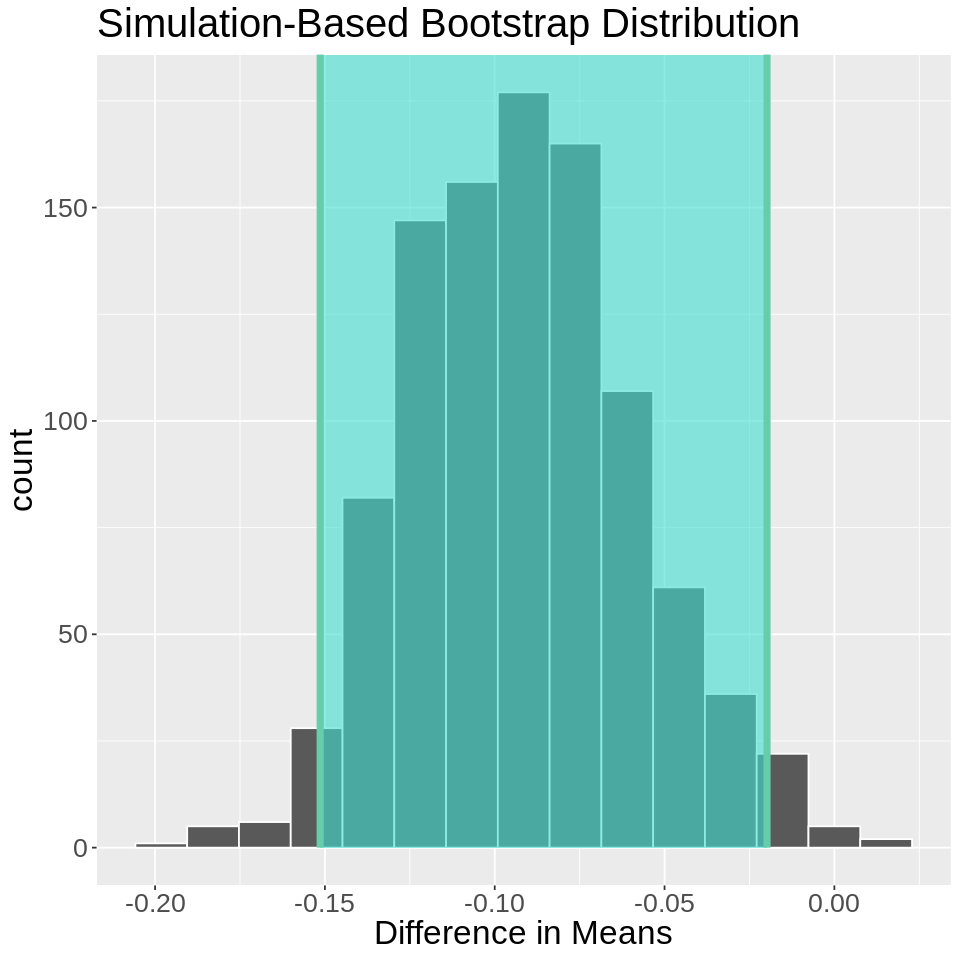

In [262]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Plotting the difference in means
diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
cat("Figure 6: Distribution of the differnce in means with 95% CI shaded")
diff_in_means_ci_plot

From the distribution, it can be concluded that observed value of difference in means i.e -0.09128 is contained inside the confidence interval. This means that if repeated samples are taken, there is a 95% confidence that the observed value would lie inside the confidence interval.

### 95% Confidence Interval for Difference in Means Using Asymptotics

Next, the difference of means of the two wines are analyzed using asymptotics under assumption of normality.

In [263]:
# Taking the sample of 500 for each type of wine
set.seed(1234)
alcohol_sample <- 
    alcohol_data %>% 
    group_by(type) %>% 
    sample_n(size = case_when(type == "red" ~ 500,
                              type == "white" ~ 500), replace = FALSE) %>% 
    ungroup()
head(alcohol_sample)

alcohol,type
<dbl>,<chr>
11.1,red
12.7,red
11.5,red
12.8,red
9.5,red
10.8,red


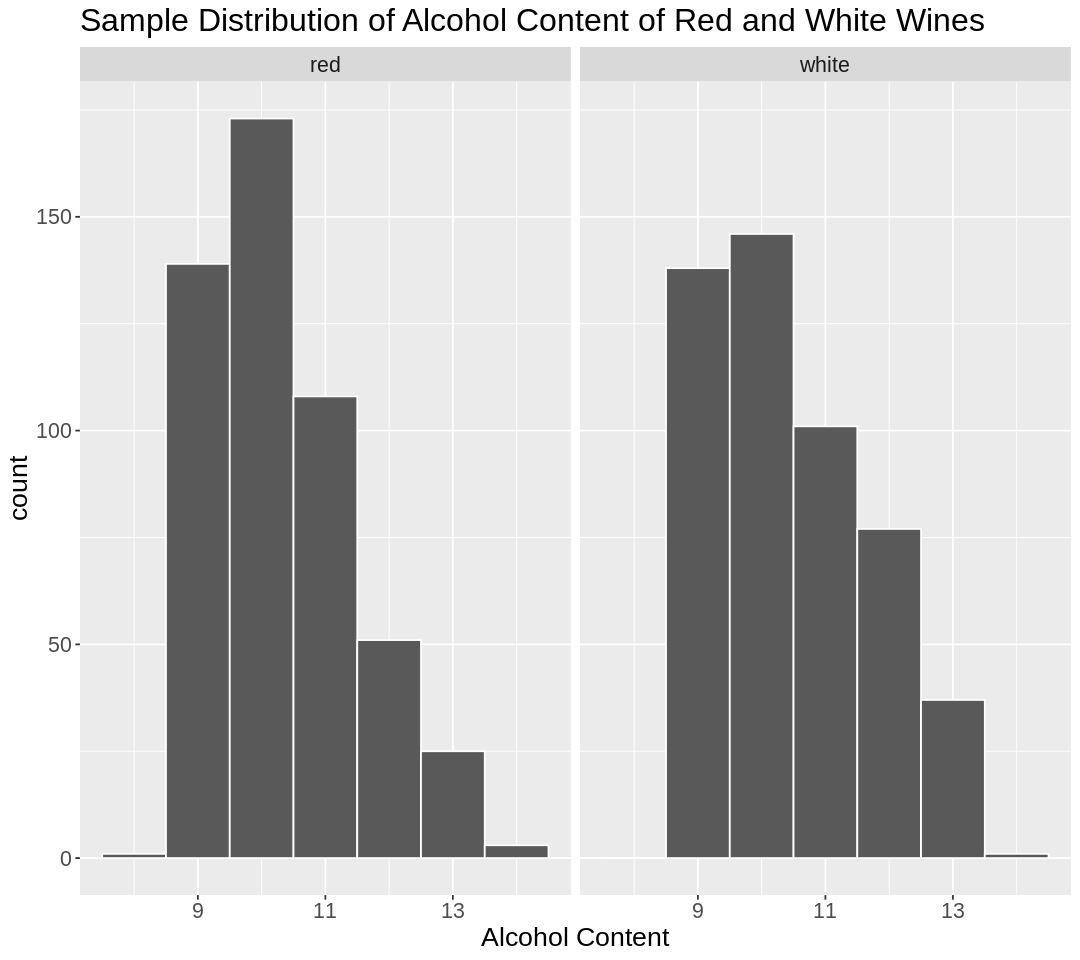

In [264]:
# Observe the sample distribution of each type of Wine
set.seed(1234)
options(repr.plot.width = 9, repr.plot.height = 8)

alocohol_samp_dist_plot <- 
    alcohol_sample %>% 
    ggplot() + 
    geom_histogram(aes(alcohol), binwidth = 1, color = 'white') +
    facet_wrap(~ type) + 
    theme(text = element_text(size = 16)) +
    ggtitle("Sample Distribution of Alcohol Content of Red and White Wines") + 
    xlab("Alcohol Content")
alocohol_samp_dist_plot



In [270]:
# Obtain the sample averages and standard error alcohol content for each type of wine.
alcohol_summary <- 
    alcohol_sample %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n()))
alcohol_summary

type,sample_mean,sample_std_error
<chr>,<dbl>,<dbl>
red,10.41770,0.04854378
white,10.54878,0.05530210


In [266]:
# Obtain a 95% confidence interval for the difference between the means using the CLT. 
red_mean <- alcohol_summary$sample_mean[1]
red_var <- alcohol_summary$sample_std_error[1]^2
white_mean <- alcohol_summary$sample_mean[2]
white_var <- alcohol_summary$sample_std_error[2]^2

alcohol_clt_ci <- 
    tibble(lower_ci = (red_mean - white_mean - qnorm(0.975) * sqrt(white_var + red_var)),
           upper_ci = (red_mean - white_mean + qnorm(0.975) * sqrt(white_var + red_var)))
alcohol_clt_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.2753049,0.01314486


Under the assumption of normality the confidence interval for the difference of means in alcohol content is [-0.2753049, 0.01314486]. Next the accuracy of this interval is tested below.

In [267]:
# Testing accuracy of the confidence interval

set.seed(1234)

# Obtain the means
true_means <-
    alcohol_data %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol)) %>% 
    pull(sample_mean)

# Obtain the true difference in mean
true_diff = true_means[1] - true_means[2]

alcohol_multiple_samples <- 
    tibble(replicate = 1:100) %>% 
    mutate(sample = map(replicate,
                        `.f` = ~
                            alcohol_data %>% 
                            group_by(type) %>% 
                            sample_n(size = case_when(type == "red" ~ 500,
                                                      type == "white" ~ 500), replace = FALSE) %>% 
                            ungroup() 
                    )
    ) %>% 
    unnest(sample) %>% 
    group_by(replicate, type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n()),
              n = n()) %>% 
    pivot_wider(names_from = type, values_from = c(sample_mean, sample_std_error, n))

head(alcohol_multiple_samples)



`summarise()` has grouped output by 'replicate'. You can override using the `.groups` argument.



replicate,sample_mean_red,sample_mean_white,sample_std_error_red,sample_std_error_white,n_red,n_white
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,10.41770,10.54878,0.04854378,0.05530210,500,500
2,10.44727,10.57767,0.04838444,0.05518236,500,500
3,10.44077,10.51393,0.04801631,0.05703223,500,500
4,10.40510,10.55533,0.04856629,0.05610298,500,500
5,10.47183,10.53833,0.04990138,0.05529266,500,500
6,10.38977,10.55136,0.04561252,0.05455038,500,500


In [268]:
# Obtaining multiple confidence intervals from different samples.
alcohol_multiple_ci <-
    alcohol_multiple_samples %>% 
    mutate(lower_ci = sample_mean_red - sample_mean_white - qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2),
           upper_ci = sample_mean_red - sample_mean_white + qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2)) %>% 
    select(replicate, lower_ci, upper_ci) %>% 
    mutate(captured = between(true_diff, lower_ci, upper_ci))
head(alcohol_multiple_ci)



replicate,lower_ci,upper_ci,captured
<int>,<dbl>,<dbl>,<lgl>
1,-0.2753049,0.013144862,TRUE
2,-0.2742425,0.013442483,TRUE
3,-0.2192891,0.072955727,TRUE
4,-0.2956704,-0.004796225,TRUE
5,-0.2124802,0.079480164,TRUE
6,-0.3009610,-0.022225621,TRUE


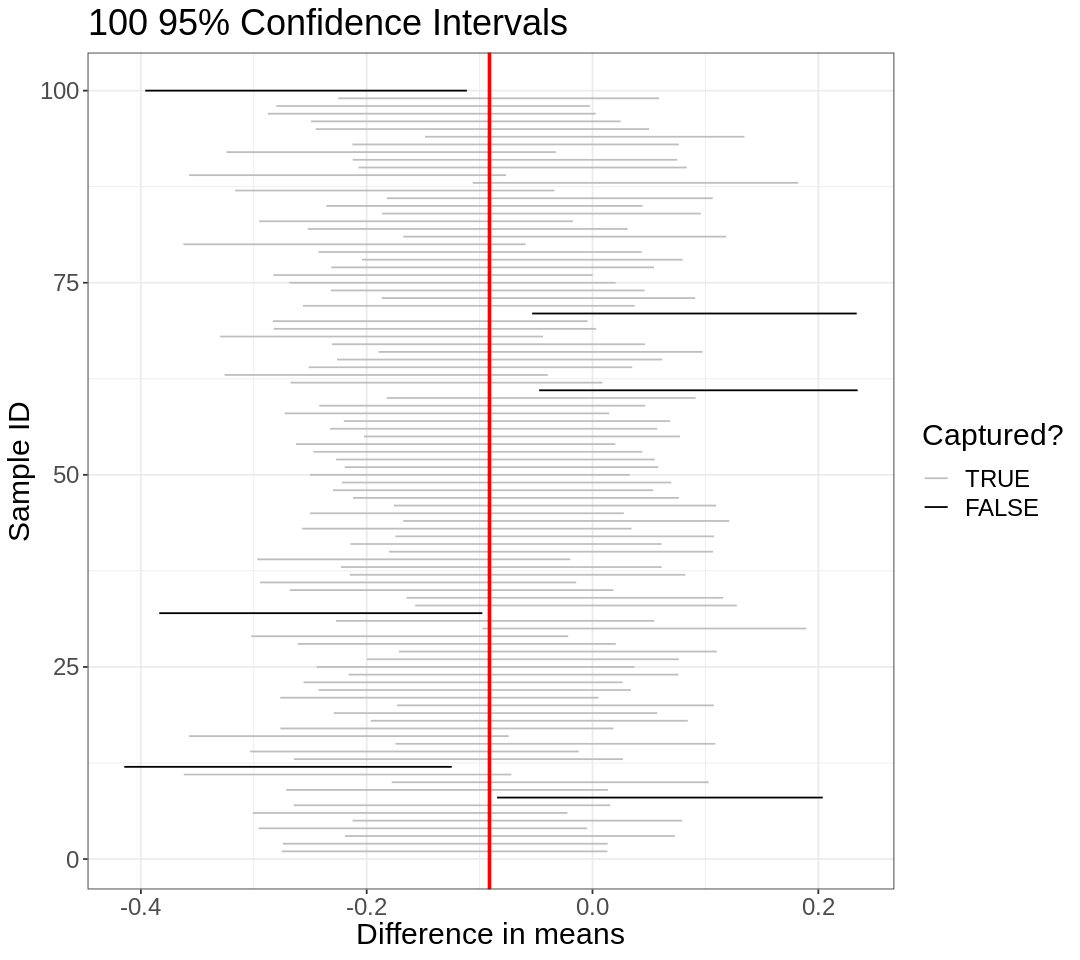

In [269]:
# Plotting multiple confidence intervals and observing if they capture the true difference in emans
alcohol_multiple_ci %>% 
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), 
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_ci,
                     xend = upper_ci,
                     y = replicate,
                     yend = replicate,
                     colour = captured)) +
    geom_vline(xintercept = true_diff, colour = "red", size = 1) +
    labs(title = "100 95% Confidence Intervals",
         x = 'Difference in means',
         y = "Sample ID",
         colour = "Captured?") +
    theme_bw() + 
    theme(text = element_text(size = 18))



The plot above shows that even though the population is not Normal, the CLT approximation is fairly accurate.

# Discussion
## Findings
#### Hypothesis Test
From the hypothesis test conducted in the report, a p-value of 0.06 is obtained. Using a 5% significance level, this p-value leads to a rejection of the null hypothesis. This suggests that with 95% certainty, the mean alcohol content of red and white wines are significantly different. This conclusion supports the estimates made in the preliminary results that white wine had a slightly higher mean alcohol content than red wine.

#### Comparing Bootstrapping and Asymptotics Methods
The confidence intervals for the different methods yielded significanlty different results. 

The 95% confidence interval constructed using bootstrapping wad [-0.1515, -0.0291]. Since this interval does not contain zero, it suggests that the difference in means of the alcohol content is significant. 

In contrast, the asymptotic method obtained a 95% confidence interval of [-0.2753, 0.0131]. This interval does contain zero. Hence, it suggests that the difference in alcohol content is not significant between red and white wines.

The confidence interval obtained by bootstrapping supports the results of the hypothesis test while the interval obtained with the asymptotic method appears to contradict the hypothesis test. Since the interval based on the CLT is quite wider than the bootstrap interval, it is likely that the bootstrapping interval is more trustworthy. 

## What impact could such findings have?
These findings could provide insights for wine making companies as well as consumers regarding what the alcohol content in wines are.
## What future questions could this lead to?
The study can be further analyzed by possibly exploring the relation between alcohol content and the other variables in the dataset. We could see if any of the other variables are correlated with the alcohol concentration to help make a regression model in future. 

# References
Zhang, Qing-An, et al. “Preliminary Study of the Effect of Ultrasound on Physicochemical Properties of Red Wine.” CyTA - Journal of Food, vol. 14, no. 1, 2015, pp. 55–64., https://doi.org/10.1080/19476337.2015.1045036.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.